In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import inspect

In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
file_btc = r'/Users/georgekeiter/Desktop/python/Bitstamp_BTCUSD_d.csv'
file_eth = r'/Users/georgekeiter/Desktop/python/Bitstamp_ETHUSD_d.csv'
btc_df = pd.read_csv(file_btc)
eth_df = pd.read_csv(file_eth)

In [4]:
btc_df = btc_df.rename(columns={'Volume ETH': 'Volume'})
eth_df = eth_df.rename(columns={'Volume BTC': 'Volume'})

In [5]:
print(btc_df)

            unix           date   symbol      open      high       low     close    Volume BTC    Volume USD
0     1682553600   4/27/23 0:00  BTC/USD  28427.00  28437.00  28389.00  28406.00  1.417765e+00  4.027302e+04
1     1682467200   4/26/23 0:00  BTC/USD  28306.00  30022.00  27242.00  28428.00  5.277187e+03  1.500199e+08
2     1682380800   4/25/23 0:00  BTC/USD  27515.00  28392.00  27197.00  28300.00  1.874166e+03  5.303890e+07
3     1682294400   4/24/23 0:00  BTC/USD  27594.00  27998.00  26981.00  27512.00  2.236655e+03  6.153485e+07
4     1682208000   4/23/23 0:00  BTC/USD  27820.00  27820.00  27347.00  27596.00  7.980455e+02  2.202286e+07
...          ...            ...      ...       ...       ...       ...       ...           ...           ...
3068  1417478400   12/2/14 0:00  BTC/USD    378.39    382.86    375.23    379.25  2.593576e+06  6.832530e+03
3069  1417392000   12/1/14 0:00  BTC/USD    376.40    382.31    373.03    378.39  2.520662e+06  6.660560e+03
3070  1417305600  1

In [6]:
def clean(coin_df):
    coin_df = coin_df.rename(columns={coin_df.filter(like='Volume').columns[0]: 'Volume'})
    coin_df.drop(['unix', 'open', 'Volume', 'Volume USD'], axis=1, inplace=True)
    coin_df['date'] = pd.to_datetime(coin_df['date'], format='%m/%d/%y %H:%M')
    coin_df['change_$'] = coin_df['close'].diff()
    coin_df['change_%'] = coin_df['close'].pct_change()
    coin_df['high_low'] = coin_df['high'] - coin_df['low']
    plt.plot(coin_df['date'], coin_df['close'])
    plt.show()
    return coin_df


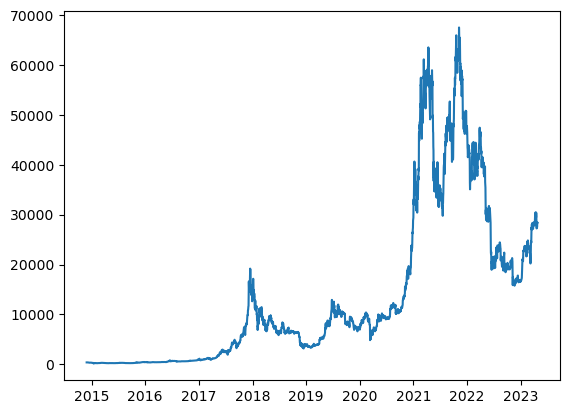

In [7]:
clean_btc = clean(btc_df)

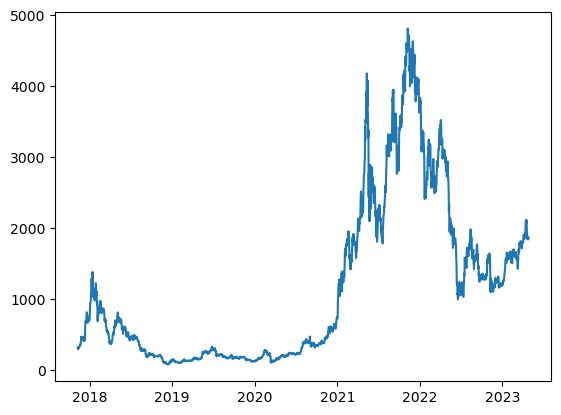

In [8]:
clean_eth = clean(eth_df)

In [9]:
def join_df(coin1_df, coin2_df):
    coin1_name = 'btc'
    coin2_name = 'eth'
    coin1_df = coin1_df[['date', 'close']]
    coin2_df = coin2_df[['date', 'close']]
    df = pd.merge(coin1_df, coin2_df, on='date', how='inner')
    df = df.rename(columns={'close_x': f"close {coin1_name}", 'close_y': f"close {coin2_name}"})
    df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y %H:%M')
    df['ratio'] = df[f"close {coin2_name}"] / df[f"close {coin1_name}"]

    plt.plot(df['date'], df[f"close {coin1_name}"], label=f"close {coin1_name}")
    plt.plot(df['date'], df[f"close {coin2_name}"], label=f"close {coin2_name}")
    plt.plot(df['date'], df['ratio'], label=f"{coin2_name}/{coin1_name}")
    plt.legend()
    plt.yscale('log')
    plt.show()
    
    return df

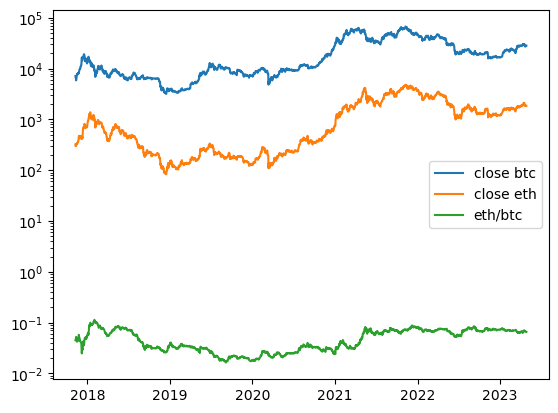

,date,close btc,close eth,ratio
0,2023-04-27,28406.00,1863.60,0.065606
1,2023-04-26,28428.00,1866.50,0.065657
2,2023-04-25,28300.00,1866.10,0.065940
3,2023-04-24,27512.00,1841.80,0.066945
4,2023-04-23,27596.00,1862.20,0.067481
...,...,...,...,...
1991,2017-11-13,6525.17,316.14,0.048449
1992,2017-11-12,5870.37,306.10,0.052143
1993,2017-11-11,6355.13,315.76,0.049686
1994,2017-11-10,6588.18,298.66,0.045333


In [10]:
join_df(btc_df, eth_df)

In [11]:
clean_btc.loc[clean_btc['change_%'].idxmax()]

date        2020-03-11 00:00:00
symbol                  BTC/USD
high                    7988.78
low                     7591.99
close                   7934.57
change_$                 3092.9
change_%               0.638809
high_low                 396.79
Name: 1142, dtype: object

In [12]:
clean_btc['rolling_7'] = clean_btc['change_%'].rolling(window=7).mean()
clean_btc['volatility'] = clean_btc['change_%'].rolling(window=7).std()
clean_btc['7_day'] = clean_btc['close'].shift(7) - clean_btc['close']

In [13]:
clean_btc

,date,symbol,high,low,close,change_$,change_%,high_low,rolling_7,volatility,7_day
0,2023-04-27,BTC/USD,28437.00,28389.00,28406.00,NaN,NaN,48.00,NaN,NaN,NaN
1,2023-04-26,BTC/USD,30022.00,27242.00,28428.00,22.00,0.000774,2780.00,NaN,NaN,NaN
2,2023-04-25,BTC/USD,28392.00,27197.00,28300.00,-128.00,-0.004503,1195.00,NaN,NaN,NaN
3,2023-04-24,BTC/USD,27998.00,26981.00,27512.00,-788.00,-0.027845,1017.00,NaN,NaN,NaN
4,2023-04-23,BTC/USD,27820.00,27347.00,27596.00,84.00,0.003053,473.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3068,2014-12-02,BTC/USD,382.86,375.23,379.25,2.58,0.006849,7.63,0.011581,0.024315,-28.76
3069,2014-12-01,BTC/USD,382.31,373.03,378.39,-0.86,-0.002268,9.28,0.005502,0.021041,-13.78
3070,2014-11-30,BTC/USD,381.99,373.32,373.34,-5.05,-0.013346,8.67,-0.001208,0.017821,3.53
3071,2014-11-29,BTC/USD,386.60,372.25,376.72,3.38,0.009053,14.35,0.000768,0.018123,-1.65


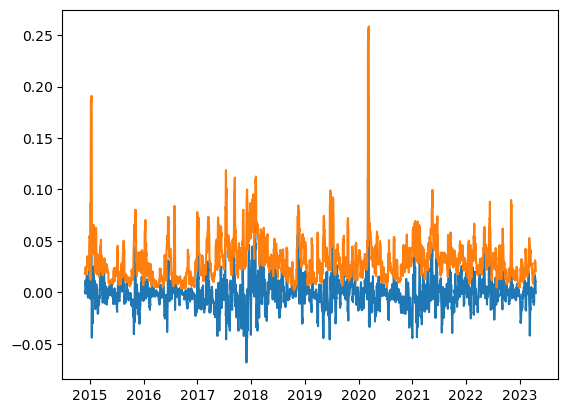

In [14]:
plt.plot(clean_btc['date'], clean_btc['rolling_7'])
plt.plot(clean_btc['date'], clean_btc['volatility'])

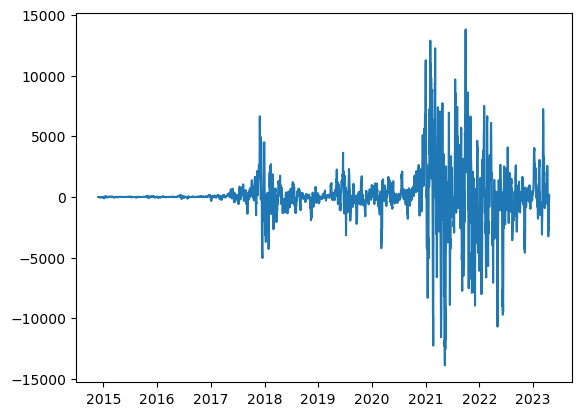

In [15]:
plt.plot(clean_btc['date'], clean_btc['7_day'])

In [16]:
clean_btc.loc[clean_btc['rolling_7'].idxmax()]

date          2020-03-05 00:00:00
symbol                    BTC/USD
high                       9169.0
low                       8757.79
close                     9066.65
change_$                   -87.14
change_%                 -0.00952
high_low                   411.21
rolling_7                0.111159
volatility               0.236016
7_day                    -4224.98
Name: 1148, dtype: object

In [17]:
clean_btc.loc[clean_btc['volatility'].idxmax()]

date          2020-03-11 00:00:00
symbol                    BTC/USD
high                      7988.78
low                       7591.99
close                     7934.57
change_$                   3092.9
change_%                 0.638809
high_low                   396.79
rolling_7                0.078102
volatility               0.258346
7_day                    -2527.65
Name: 1142, dtype: object

In [27]:
max_index = clean_btc['7_day'].idxmax()
print(clean_btc.loc[max_index])

date          2021-09-29 00:00:00
symbol                    BTC/USD
high                     42595.93
low                       40750.0
close                     41542.9
change_$                 -2291.53
change_%                -0.052277
high_low                  1845.93
rolling_7               -0.039613
volatility               0.034777
7_day                    13802.89
Name: 575, dtype: object


In [31]:
seven_day_window = clean_btc.iloc[max_index-7:max_index+2]
print(seven_day_window)

          date   symbol      high       low     close  change_$  change_%  high_low  rolling_7  volatility     7_day  7_day_sum
568 2021-10-06  BTC/USD  55800.00  50428.64  55345.79   1558.19  0.028969   5371.36  -0.004794    0.027878   2028.76   -2028.76
569 2021-10-05  BTC/USD  51914.68  49075.00  51501.19  -3844.60 -0.069465   2839.68  -0.011284    0.036924   4494.30   -4494.30
570 2021-10-04  BTC/USD  49530.53  46900.00  49242.14  -2259.05 -0.043864   2630.53  -0.021351    0.034392   8243.06   -8243.06
571 2021-10-03  BTC/USD  49225.55  47119.87  48235.93  -1006.21 -0.020434   2105.68  -0.017385    0.032320   6479.02   -6479.02
572 2021-10-02  BTC/USD  48361.83  47468.15  47685.80   -550.13 -0.011405    893.68  -0.019699    0.031021   7291.12   -7291.12
573 2021-10-01  BTC/USD  48500.00  43291.07  48171.86    486.06  0.010193   5208.93  -0.015593    0.033036   5785.35   -5785.35
574 2021-09-30  BTC/USD  44117.74  41427.87  43834.43  -4337.43 -0.090041   2689.87  -0.028007    0.0425